# PROCESO TECNOLÓGICO DE EXTRACCIÓN DEL ORO

### Introducción
- En este proyecto trabajaré para preparar un prototipo de un modelo de machine learning para Zyfra con el objetivo de encontrar el mejor. Dicha empresa desarrolla soluciones de eficiencia para la industria pesada. Es necesario que el modelo prediga la cantidad de oro extraído para ello trabajaremos con la documentación brindada. Para comenzar importaré las librerías, cargaré los datos y los preparé para así poder continuar desarrollando el proyecto. En la próxima etapa haré un análisis de los datos para comprenderlos mejor y finalmente lograr el objetivo, construir y encontrar el mejor modelo. 

### Objetivo
- El objetivo es encontrar el mejor modelo que prediga la cantidad de oro extraído del mineral de oro.

### Etapas
1. Importar las librerías, cargar y preparar los datos.
2. Analizar los datos.
3. Construcción de modelos.
4. Conclusiones generales.

## Importar las librerías, cargar y preparar los datos.

### Abrir los archivos y examinar los datos.

In [5]:
#Importar las librerías
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [6]:
#Cargando los datos
data_train = pd.read_csv('gold_recovery_full.csv')
data_test = pd.read_csv('gold_recovery_test.csv')
data_full = pd.read_csv('gold_recovery_train.csv')

In [7]:
# función para explorar los datos
def data_exploration(dataframe):
    return (f'Primeras cinco columnas del dataframe:', dataframe.head(), f'Últimas filas del dataframe:',dataframe.tail(),dataframe.info(), f'Descripción de los datos:',dataframe.describe())

In [8]:
# explorar los datos
data_exploration(data_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


('Primeras cinco columnas del dataframe:',
                   date  final.output.concentrate_ag  \
 0  2016-01-15 00:00:00                     6.055403   
 1  2016-01-15 01:00:00                     6.029369   
 2  2016-01-15 02:00:00                     6.055926   
 3  2016-01-15 03:00:00                     6.047977   
 4  2016-01-15 04:00:00                     6.148599   
 
    final.output.concentrate_pb  final.output.concentrate_sol  \
 0                     9.889648                      5.507324   
 1                     9.968944                      5.257781   
 2                    10.213995                      5.383759   
 3                     9.977019                      4.858634   
 4                    10.142511                      4.939416   
 
    final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
 0                    42.192020              70.541216             10.411962   
 1                    42.701629              69.266198             

In [9]:
# explorar los datos
data_exploration(data_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

('Primeras cinco columnas del dataframe:',
                   date  primary_cleaner.input.sulfate  \
 0  2016-09-01 00:59:59                     210.800909   
 1  2016-09-01 01:59:59                     215.392455   
 2  2016-09-01 02:59:59                     215.259946   
 3  2016-09-01 03:59:59                     215.336236   
 4  2016-09-01 04:59:59                     199.099327   
 
    primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
 0                         14.993118                         8.080000   
 1                         14.987471                         8.080000   
 2                         12.884934                         7.786667   
 3                         12.006805                         7.640000   
 4                         10.682530                         7.530000   
 
    primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
 0                        1.005021                             1398.981301   
 1         

In [10]:
# explorar los datos
data_exploration(data_full)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


('Primeras cinco columnas del dataframe:',
                   date  final.output.concentrate_ag  \
 0  2016-01-15 00:00:00                     6.055403   
 1  2016-01-15 01:00:00                     6.029369   
 2  2016-01-15 02:00:00                     6.055926   
 3  2016-01-15 03:00:00                     6.047977   
 4  2016-01-15 04:00:00                     6.148599   
 
    final.output.concentrate_pb  final.output.concentrate_sol  \
 0                     9.889648                      5.507324   
 1                     9.968944                      5.257781   
 2                    10.213995                      5.383759   
 3                     9.977019                      4.858634   
 4                    10.142511                      4.939416   
 
    final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
 0                    42.192020              70.541216             10.411962   
 1                    42.701629              69.266198             

#### Conclusiones intermedias
- Al explorar los datos puedo observar que el Dataframe data_train contiene un total de 87 columnas y 16860 filas, data_test 53 columnas y 5856 filas, data_full con 87 columnas y 22716 filas. Además veo que hay valores ausentes en los 3 Dataframe, los cuales abordaré más adelante. Todas las columnas son del tipo float con excepción de 'date' que es de tipo object la cual convertiré a datetime.

### Comprobación del cálculo de recuperación.

In [11]:
# Calcular la recuperacion de rougher.output.recovery
cr = data_train['rougher.output.concentrate_au'] 
fr = data_train['rougher.input.feed_au']
tr = data_train['rougher.output.tail_au']
recovery_rougher = (cr*(fr-tr))/(fr*(cr-tr))*100

In [12]:
# Calcular el EAM
def eam(y, y_predictions):
    error = 0
    for i in range(len(y)):
        error += np.nansum(abs(y[i]- y_predictions[i]))
    return error/len(y)
eam(data_train['rougher.output.recovery'], recovery_rougher)

8.497257797509997e-15

In [13]:
recovery_rougher

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
22711    89.574376
22712    87.724007
22713    88.890579
22714    89.858126
22715    89.514960
Length: 22716, dtype: float64

In [14]:
data_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
22711    89.574376
22712    87.724007
22713    88.890579
22714    89.858126
22715    89.514960
Name: rougher.output.recovery, Length: 22716, dtype: float64

#### Conclusiones intermedias
- Luego de calcular el error medio absoluto puedo llegar al conclusión de que la diferencia es ínfima, no es significativa por lo que podría expresar que es correcto el cálculo de recuperación.

### Analizar características no disponibles en el conjunto de prueba.

In [15]:
# Observando las columnas del conjunto de prueba
data_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [16]:
# Observando las columnas del conjunto de entrenamiento
data_train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [17]:
#crear una lista de las columnas que no están en test
lista = set(data_train.columns.values).difference(set(data_test.columns.values))
lista = list(lista)
lista

['final.output.tail_ag',
 'final.output.concentrate_ag',
 'rougher.calculation.au_pb_ratio',
 'final.output.recovery',
 'primary_cleaner.output.concentrate_ag',
 'rougher.output.tail_ag',
 'primary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.tail_pb',
 'rougher.output.concentrate_ag',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.tail_sol',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.output.tail_pb',
 'secondary_cleaner.output.tail_pb',
 'rougher.output.recovery',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.tail_ag',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.tail_au',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'final.output.concentrate_sol',
 'rougher.output.tail_au',
 'final.ou

In [18]:
lista.remove('rougher.output.recovery')
lista.remove('final.output.recovery')

In [19]:
# eliminar columnas en train que no están en test
data_train.drop(lista,axis=1,inplace=True)
data_train.shape

(22716, 55)

In [20]:
data = data_full[['rougher.output.recovery','final.output.recovery', 'date']]

In [21]:
# merge para agregar variables objetivo al conjunto de prueba
data_test = data_test.merge(data, how='left', on = 'date')
data_test.shape

(5856, 55)

#### Conclusiones intermedias
Luego de analizar las columnas que están en el conjunto de entrenamiento que no se encuentran en el conjunto de prueba puedo decir que la mayoría son del tipo **output**(parámetros del producto) y además que las eliminaré con excepción de 'rougher.output.recovery' y 'final.output.recovery' que la tendré que utilizar más adelante como variables objetivo. Además agregué estas dos variables objetivo al conjunto de prueba con ayuda de un merge.

### Preprocesamiento de datos.

In [22]:
# validar si existen duplicados
data_test.duplicated().sum()

0

In [23]:
# validar si existen duplicados
data_train.duplicated().sum()

0

In [24]:
# validar si existen duplicados
data_full.duplicated().sum()

0

In [25]:
# remplazar valores ausentes
data_full.fillna(method = 'ffill', inplace=True)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16860 non-null  float64
 2   final.output.concentrate_pb                         16860 non-null  float64
 3   final.output.concentrate_sol                        16860 non-null  float64
 4   final.output.concentrate_au                         16860 non-null  float64
 5   final.output.recovery                               16860 non-null  float64
 6   final.output.tail_ag                                16860 non-null  float64
 7   final.output.tail_pb                                16860 non-null  float64
 8   final.output.tail_sol                               16860 non-null  float64


In [26]:
# remplazar valores ausentes
data_test.fillna(method = 'ffill', inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5856 non-null   float64
 2   primary_cleaner.input.depressant            5856 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 10  primary_clea

In [27]:
# remplazar valores ausentes
data_train.fillna(method = 'ffill', inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        22716 non-null  object 
 1   final.output.recovery                       22716 non-null  float64
 2   primary_cleaner.input.sulfate               22716 non-null  float64
 3   primary_cleaner.input.depressant            22716 non-null  float64
 4   primary_cleaner.input.feed_size             22716 non-null  float64
 5   primary_cleaner.input.xanthate              22716 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      22716 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    22716 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      22716 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    22716 non-null  float64
 10  primary_cl

In [28]:
# Convertir columna al tipo datetime
data_train['date'] = pd.to_datetime(data_train['date'])
data_test['date'] = pd.to_datetime(data_test['date'])
data_full['date'] = pd.to_datetime(data_full['date'])

#### Conclusiones intermedias
- En esta etapa de preprocesamiento de datos validé que no existiesen duplicados, imputé los valores ausentes con apoyo del método **fillna** usando como argumento el método **ffill** y además convertí a columna 'date' al tipo datetime. A continuación profundizaré en el análisis de los datos.

## Analizar los datos.

### Variación de la concentración de los metales (Au, Ag, Pb) 

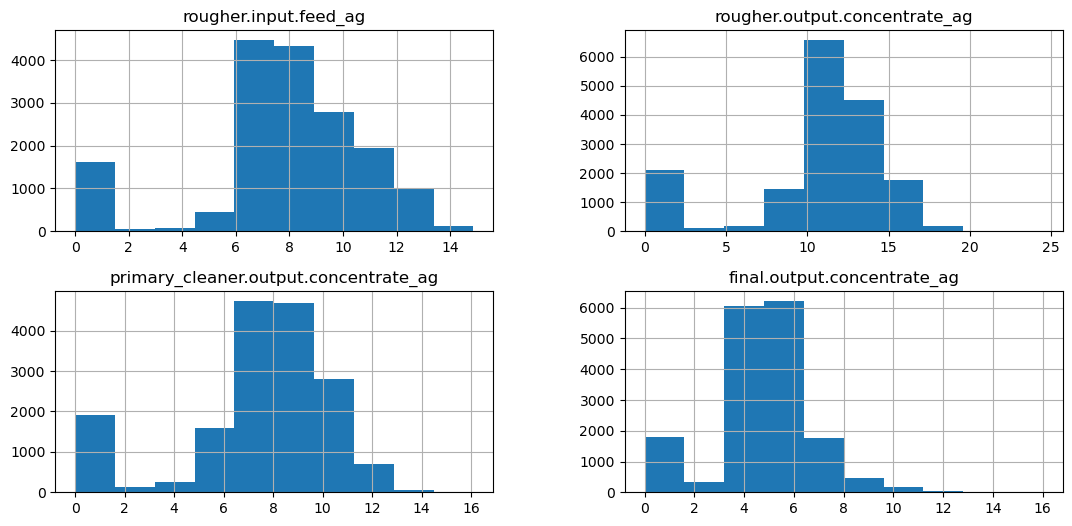

In [29]:
concentrate_ag = data_full[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
concentrate_ag.hist(figsize=(13,6))
plt.show()

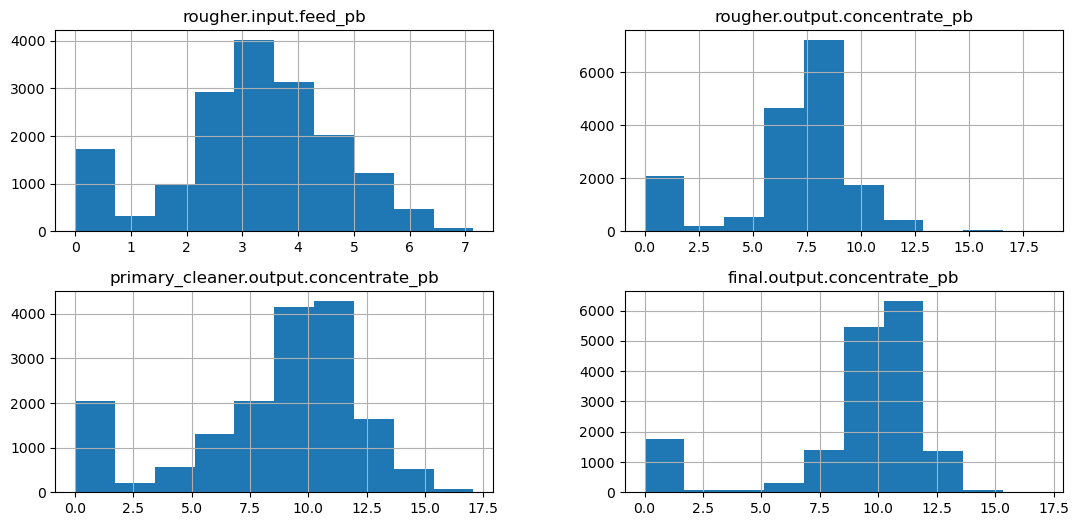

In [30]:
concentrate_ag = data_full[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]
concentrate_ag.hist(figsize=(13,6))
plt.show()

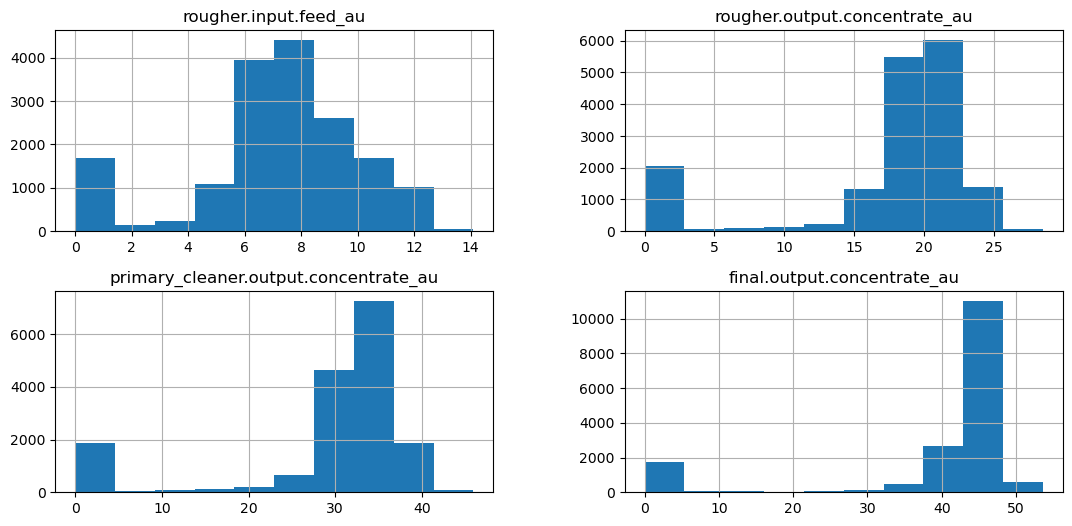

In [31]:
concentrate_au = data_full[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
concentrate_au.hist(figsize=(13,6))
plt.show()

#### Conclusiones
- Luego de analizar la variación de las concentraciones de las sustancias dependiendo de la etapa de purificación puedo llegar a la conclusión de que aumenta la concentración del au y pb mientras que la de ag disminuye, pero bueno la finalidad de este proyecto es enfocada en la concentración de oro así que por ahora todo bien.

### Comparar las distribuciones del tamaño de las partículas de la alimentación.

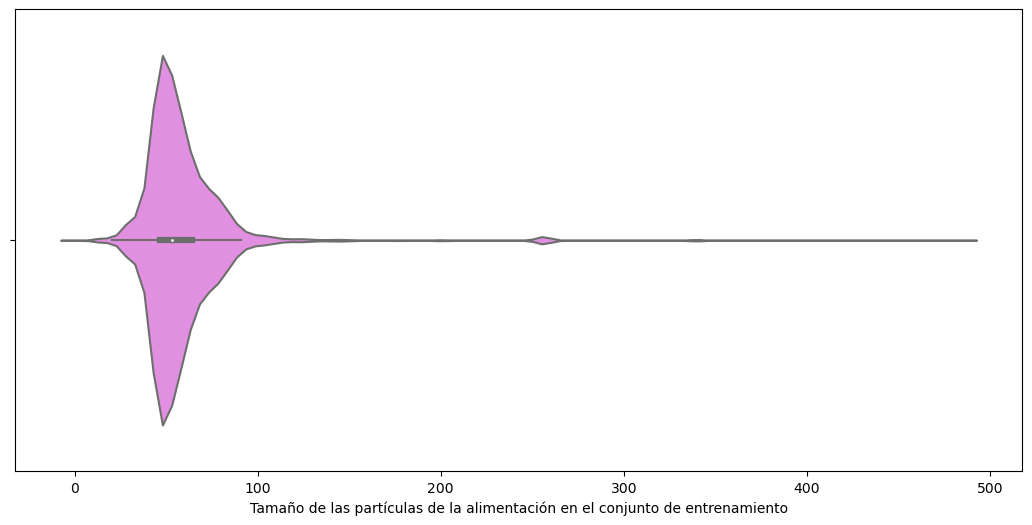

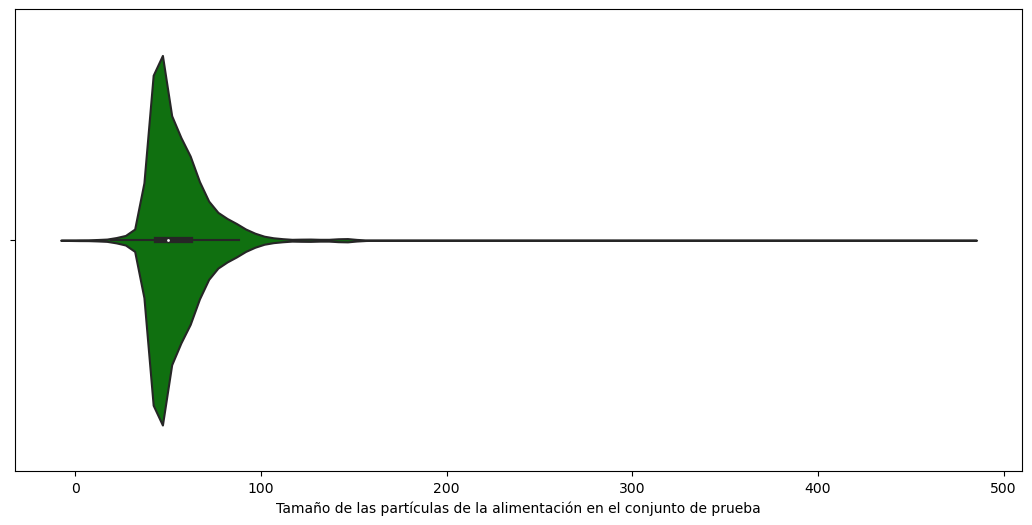

In [32]:
plt.figure(figsize = (13,6))
sns.violinplot(x=data_train['rougher.input.feed_size'],color = 'violet', saturacion=0.9, grid=True)
plt.xlabel('Tamaño de las partículas de la alimentación en el conjunto de entrenamiento')
plt.show()
plt.figure(figsize = (13,6))
sns.violinplot(x=data_test['rougher.input.feed_size'],color = 'green', saturacion=0.9, grid=True)
plt.xlabel('Tamaño de las partículas de la alimentación en el conjunto de prueba')
plt.show()

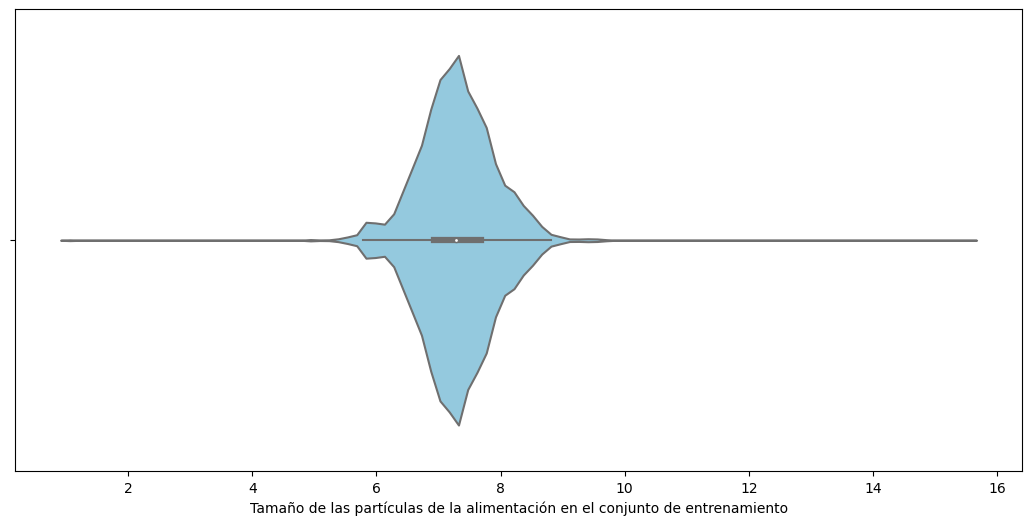

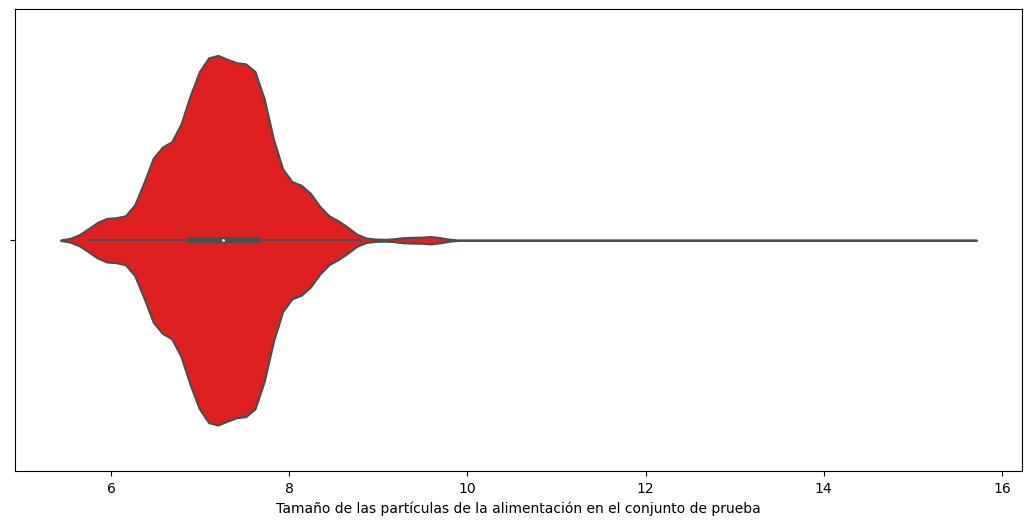

In [33]:
plt.figure(figsize = (13,6))
sns.violinplot(x=data_train['primary_cleaner.input.feed_size'],color = 'skyblue', saturacion=0.9, grid=True)
plt.xlabel('Tamaño de las partículas de la alimentación en el conjunto de entrenamiento')
plt.show()
plt.figure(figsize = (13,6))
sns.violinplot(x=data_test['primary_cleaner.input.feed_size'],color = 'red', saturacion=0.9, grid=True)
plt.xlabel('Tamaño de las partículas de la alimentación en el conjunto de prueba')
plt.show()

#### Conclusiones
- Por lo que observo puedo llegar a la conclusión de que existen diferencias significativas en las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y de prueba.

### Concentraciones finales de las sustancias en las etapas: materia prima, concentrado rougher y concentrado final.

0        51.680034
1        50.659114
2        50.609929
3        51.061546
4        47.859163
           ...    
16855    53.415050
16856    53.696482
16857    54.589604
16858    54.027355
16859    53.535054
Length: 16860, dtype: float64


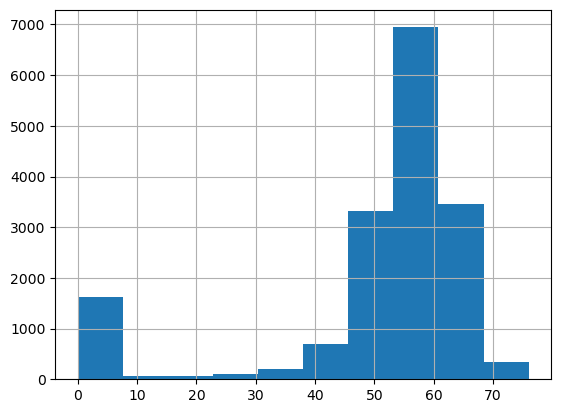

In [34]:
total_raw_material = data_full['rougher.input.feed_ag']+data_full['rougher.input.feed_au']+data_full['rougher.input.feed_pb']+data_full['rougher.input.feed_sol']
print(total_raw_material)
total_raw_material.hist()
plt.show()

In [35]:
total_raw_material.describe()

count    16860.000000
mean        50.443496
std         18.176831
min          0.000000
25%         50.290705
50%         55.787615
75%         60.262953
max         76.024095
dtype: float64

0        66.424950
1        67.012710
2        66.103793
3        65.752751
4        65.908382
           ...    
16855    70.781325
16856    70.539603
16857    55.376330
16858    69.201689
16859    69.544003
Length: 16860, dtype: float64


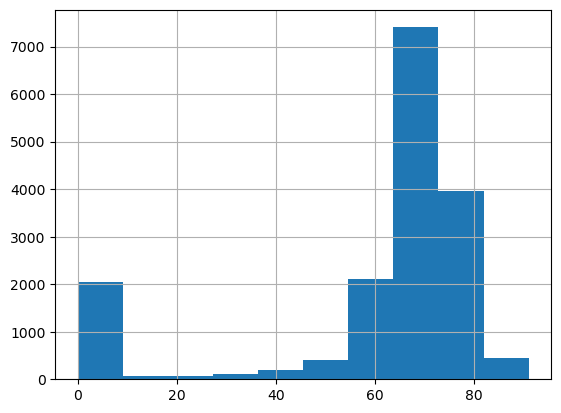

In [36]:
total_rougher_concentrate = data_full['rougher.output.concentrate_ag']+data_full['rougher.output.concentrate_au']+data_full['rougher.output.concentrate_pb']+data_full['rougher.output.concentrate_sol']
print(total_rougher_concentrate)
total_rougher_concentrate.hist()
plt.show()

In [37]:
total_rougher_concentrate.describe()

count    16860.000000
mean        59.961791
std         24.042979
min          0.000000
25%         61.468859
50%         68.332115
75%         73.020072
max         90.964431
dtype: float64

0        63.644396
1        63.957723
2        64.311180
3        63.573449
4        64.004667
           ...    
16855    68.098589
16856    68.274362
16857    68.226068
16858    68.200449
16859    68.353154
Length: 16860, dtype: float64


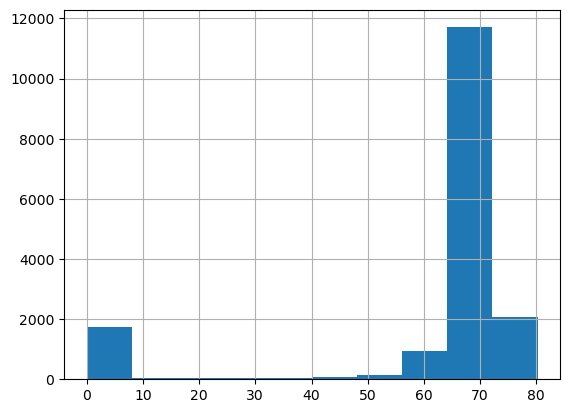

In [38]:
total_final_concentrate = data_full['final.output.concentrate_pb']+data_full['final.output.concentrate_ag']+data_full['final.output.concentrate_au']+data_full['final.output.concentrate_sol']
print(total_final_concentrate)
total_final_concentrate.hist()
plt.show()


In [39]:
total_final_concentrate.describe()

count    16860.000000
mean        61.267542
std         21.690164
min          0.000000
25%         66.531283
50%         68.803475
75%         70.695552
max         80.210644
dtype: float64

#### Conclusiones
- En esta sección estuve observando las concentraciones totales de las sustancias en las siguientes etapas: materia prima, concentrado rougher y concentrado final. Puedo concluir diciendo que va aumentando la concentración mientras se pasa de etapa, además de que varían las distribuciones. Con lo que arroja el método describe() y los gráficos veo claramente que existen valores atípicos pero no me encuentro en condiciones de eliminarlos porque no soy especialista en el tema de extracción del oro. A continuación pasaré a la etapa del proyecto: Construcción de modelos.

## Construcción de modelos.

### Construcción de la función para el cálculo de la métrica sMAPE

In [40]:
# variables y calculo de recovery_final
cf = data_full['final.output.concentrate_au'] 
ff = data_full['rougher.output.concentrate_au']
tf = data_full['final.output.tail_ag']
recovery_final = (cf*(ff-tf))/(ff*(cf-tf))*100

In [41]:
# función para calcular SMAPE
def smape_(x, x_predictions, **kwargs):
    n = len(x)
    abs_x = abs(x)
    abs_x_pred = abs(x_predictions)
    abs_diff = abs(x - x_predictions)
    
    return 100*(2/n) * np.nansum(abs_diff / (abs_x + abs_x_pred))

In [42]:
# función para smape final
def smape_final(x, x_predictions):
    pred_target_first = x_predictions[:, 0]
    pred_target_second = x_predictions[:, 1]

    smape_rougher = smape_(x.iloc[:, 0], pred_target_first)
    smape_final = smape_(x.iloc[:, 1], pred_target_second)
    
    return 25% smape_rougher + 75% smape_final

In [43]:
smape_final_scorer = make_scorer(smape_final,greater_is_better=True)

### Construcción de los modelos

In [44]:
# Variables para el conjunto de entrenamiento
target_train = data_train[['rougher.output.recovery','final.output.recovery']] # objetivo
features_train = data_train.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1) # características

# Variables para el conjunto de prueba
target_test = data_test[['rougher.output.recovery','final.output.recovery']] # objetivo
features_test = data_test.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1) # características

In [45]:
#desarrollo del modelo Regresión lineal con validación cruzada
model_regression = LinearRegression()
model_regression.fit(features_train,target_train)
smape = cross_validate(model_regression, features_train, target_train, cv=5, scoring = smape_final_scorer) 
print(smape.keys())
result = smape['test_score']
result_mean = result.mean()
f'El promedio de porcetaje de error del modelo es: {result_mean}'

dict_keys(['fit_time', 'score_time', 'test_score'])


'El promedio de porcetaje de error del modelo es: 12.789001959463075'

In [ ]:
#desarrollo del modelo Bosque aleatorio con validación cruzada
model_forest = RandomForestRegressor(random_state=0)
model_forest.fit(features_train,target_train)
params = [{'max_depth': range(1,100,40), 'n_estimators': range(1,100,40)}]
cv_rfr = GridSearchCV(model_forest, param_grid= params, scoring = smape_final_scorer) 
cv_rfr.fit(features_train,target_train)
print(f'Mejores hiperparámetros:{cv_rfr.best_params_}')
f'El promedio de porcetaje de error del modelo es: {cv_rfr.best_score_}'

In [ ]:
#desarrollo del modelo Árboles de decisión con validación cruzada
model_tree = DecisionTreeRegressor(random_state=0)
model_tree.fit(features_train,target_train)
params = [{'max_depth': range(1,100,20)}]
cv_dtr = GridSearchCV(model_tree, param_grid= params, scoring = smape_final_scorer) 
cv_dtr.fit(features_train,target_train)
print(f'Mejores hiperparámetros:{cv_dtr.best_params_}')
f'El promedio de porcetaje de error del modelo es: {cv_dtr.best_score_}'                  

In [ ]:
# comprobación del modelo con el conjunto test
test_predictions = model_regression.predict(features_test)
recm = mean_squared_error(target_test,test_predictions) ** 0.5
smape_final_ = smape_final(target_test,test_predictions)
print('Valor del error cuadrático medio del modelo:', recm)
f'El promedio de porcetaje de error del modelo con el conjunto de prueba es: {smape_final_}' 

- Finalmente construí 3 modelos de regresión(Regresión lineal, Bosque aleatorio, Árboles de decisión) usando la validación cruzada con las herramientas de sklearn y hallamos los mejores hiperparámetros con GridSearchCV(), ya que es mucho más rápido. Seleccioné el modelo de Regresión lineal como el mejor modelo porque obtuve el menor porcentaje de error y lo comprobé con el conjunto de prueba hallando el valor del error cuadrático medio y el sMAPE el cual dió como resultado un valor más próximo, mientras menor sea el error mejor será el modelo.

## Conclusiones generales.
Luego de finalizado el proyecto recapitularé las conclusiones generales de cada etapa:
1. En la exploración de datos nos encontramos con valores ausentes por lo que fue necesario abordarlos para ello utilicé un método fillna y dentro de este el método 'ffill' como argumento. También hicimos el cálculo de recuperación para el conjunto de entrenamiento el cual consideré que es correcto.
2. En la etapa de análisis de datos comencé revisando las variaciones de las sustancias en cada una de las etapas llegando a la conclusión de que el oro va aumentando la concentración mientras avanza la purificación. También estuve analizando las variaciones de las concentraciones totales de las sustancias en tres grupos: materia prima, concentrado rougher y concentrado final. Llegando a la conclusión de que mientras pasa de etapa aumenta la concentración y varian las distribuciones.
3. Finalmente construí 3 modelos de regresión utilizando la validación cruzada y obtuve como el mejor al de Regresión lineal ya que presenta un bajo valor de error.